Clusterização de Clientes
Objetivo: Descobrir categorias de clientes de acordo com o perfil de consumo.

In [612]:
import pandas as pd;
from sklearn.cluster import KMeans;
from sklearn import preprocessing;
import matplotlib.pyplot as plt;
from sklearn.decomposition import PCA;
import seaborn as sns;

In [613]:
df = pd.read_csv("archive/online_retail_II.csv");

In [614]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [615]:
#Verificando valores nulos
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [616]:
#inplace=True - modifica o dataframe ao invés de criar outro.
#Linhas que não possuem "Customer ID" serão delatadas, pois, não há tratamento para esse tipo de dado faltante.
df.dropna(subset=["Customer ID"],inplace=True);

In [617]:
#Podemos verificar que todas as linhas que possuem a coluna "Description" nula também possuiam a coluna "Customer ID" nula.
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [618]:
#Invoices com quantidades negativas indicam que o pedido foi cancelado, elas também possuem a letra C como prefixo na invoice.
#Pedidos cancelados não serão contabilizados.
df = df[df["Quantity"] > 0];

In [619]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [620]:
#Valor total do item
df["Value"] = df["Quantity"] * df["Price"];

In [621]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


In [622]:
# df.groupby(by=["Customer ID","Country"]).sum(numeric_only=True).reset_index()
#Agrupando valores
df_customer = df.groupby(by=["Customer ID","Country"]).agg(
     Quantity = ("Quantity","sum"),
     Value = ("Value","sum"),
     Items = ("Invoice","count"),
     Invoices = ("Invoice","nunique"),
     Product = ("StockCode", "nunique"),
     ).reset_index();

In [623]:
#Criando as features que serão analisadas pelo KMeans
df_customer["Avarage_Quantity"] = df_customer["Quantity"] / df_customer["Product"]
df_customer["Avarage_Value"] = df_customer["Value"] / df_customer["Invoices"]
df_customer["Avarage_Items"] = df_customer["Items"] / df_customer["Invoices"]
df_customer["Avarage_Products"] = df_customer["Product"] / df_customer["Invoices"]

In [624]:
#Convertendo o campo Country de texto para inteiro, dessa forma ele pode ser utilizado no KMeans
le = preprocessing.LabelEncoder();
le.fit(df_customer["Country"]);
df_customer["NCountry"] = le.transform(df_customer["Country"]);

In [625]:
#Excluindo colunas desnecessárias
df_customer.drop(["Customer ID","Country","Quantity","Value","Items","Invoices","Product"],axis=1,inplace=True)

In [626]:
df_customer

,Avarage_Quantity,Avarage_Value,Avarage_Items,Avarage_Products,NCountry
0,2751.296296,6463.038333,2.833333,2.250000,38
1,26.079365,704.165000,31.625000,15.750000,16
2,108.560000,403.880000,10.200000,5.000000,12
3,11.768116,1107.172500,43.750000,34.500000,18
4,11.588235,334.400000,17.000000,17.000000,26
...,...,...,...,...,...
5889,4.923295,124.393182,44.818182,16.000000,38
5890,17.642857,461.680000,28.000000,28.000000,38
5891,12.083333,427.000000,12.000000,12.000000,38
5892,9.074627,648.215000,33.500000,33.500000,38


In [627]:
#Calculando vários KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_customer)
    inertias.append(kmeans.inertia_)

D:\OneDrive\Pós Graduação\1º Semestre\Machine Learning\Exercícios\Trabalho Final\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\OneDrive\Pós Graduação\1º Semestre\Machine Learning\Exercícios\Trabalho Final\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\OneDrive\Pós Graduação\1º Semestre\Machine Learning\Exercícios\Trabalho Final\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\OneDrive\Pós Graduação\1º Semestre\Machine Learning\Exercícios\Trabalho Final\venv\Lib\site-packages\sklea

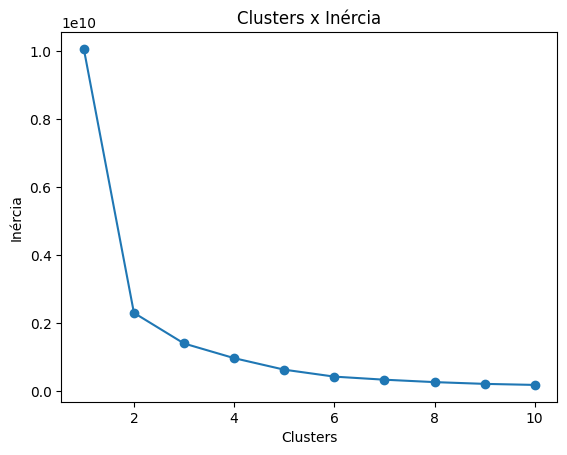

In [628]:
#Verificando melhor quantidade de clusters
plt.plot(range(1,11), inertias, marker='o')
plt.title('Clusters x Inércia')
plt.xlabel('Clusters')
plt.ylabel('Inércia')
plt.show()

In [629]:
#Calculando KMeans com 5 clusters
kmeans = KMeans(n_clusters=5)

In [630]:
y = kmeans.fit_predict(df_customer)

D:\OneDrive\Pós Graduação\1º Semestre\Machine Learning\Exercícios\Trabalho Final\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [631]:
#Atribuindo cluster calculado
df_customer["Cluster"] = y

In [632]:
df_customer

,Avarage_Quantity,Avarage_Value,Avarage_Items,Avarage_Products,NCountry,Cluster
0,2751.296296,6463.038333,2.833333,2.250000,38,2
1,26.079365,704.165000,31.625000,15.750000,16,0
2,108.560000,403.880000,10.200000,5.000000,12,0
3,11.768116,1107.172500,43.750000,34.500000,18,3
4,11.588235,334.400000,17.000000,17.000000,26,0
...,...,...,...,...,...,...
5889,4.923295,124.393182,44.818182,16.000000,38,0
5890,17.642857,461.680000,28.000000,28.000000,38,0
5891,12.083333,427.000000,12.000000,12.000000,38,0
5892,9.074627,648.215000,33.500000,33.500000,38,0


In [633]:
#Convertendo KMeans para duas dimensões, de uma forma que pode ser visualizado
pca_num_components = 2;

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_customer);
results = pd.DataFrame(reduced_data,columns=["PCA1","PCA2"]);

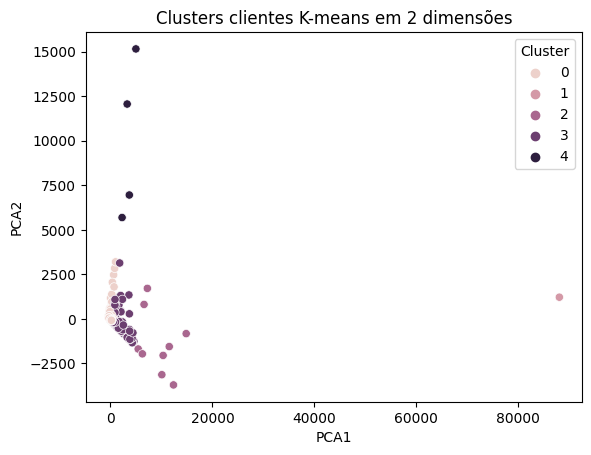

In [634]:
sns.scatterplot(x="PCA1", y="PCA2", hue=df_customer["Cluster"], data=results);
plt.title("Clusters clientes K-means em 2 dimensões");
plt.show()

In [635]:
#Quantidade de clientes por cluster
df_customer.groupby(df_customer["Cluster"])["Cluster"].count().sort_values()

Cluster
1       1
4       4
2       9
3     268
0    5612
Name: Cluster, dtype: int64

In [645]:
#Países por grupo
df_customer.groupby(df_customer["Cluster"])["NCountry"].nunique().sort_values()

Cluster
1     1
4     1
2     4
3    33
0    37
Name: NCountry, dtype: int64

In [646]:
#Quantidade média por produto
df_customer.groupby(df_customer["Cluster"])["Avarage_Quantity"].sum().sort_values()

Cluster
2     13357.001564
1     26999.000000
4     42474.285714
3     44535.241138
0    130893.705320
Name: Avarage_Quantity, dtype: float64

In [651]:
#Valor médio por pedido
df_customer.groupby(df_customer["Cluster"])["Avarage_Value"].sum().sort_values()

Cluster
4    3.543382e+03
1    8.423625e+04
2    8.819793e+04
3    4.155908e+05
0    1.716515e+06
Name: Avarage_Value, dtype: float64

In [648]:
#Quantidade média de itens por pedido
df_customer.groupby(df_customer["Cluster"])["Avarage_Items"].sum().sort_values()

Cluster
1         1.500000
4         8.776316
2       181.433333
3     10852.379387
0    119265.406187
Name: Avarage_Items, dtype: float64

In [650]:
#Quantidade média de produtos distintos por pedido
df_customer.groupby(df_customer["Cluster"])["Avarage_Products"].sum().sort_values()

Cluster
1        1.500000
4        2.198778
2      165.350000
3     8743.317236
0    95193.824851
Name: Avarage_Products, dtype: float64